# Predict the Price of Diamionds using Machine Learning and Modeling

In [4]:
# Import Data
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
19978,1.51,Premium,J,VS1,61.8,61.0,8524,7.26,7.21,4.47
18638,1.46,Premium,H,SI2,61.4,59.0,7604,7.30,7.26,4.47
44350,0.56,Ideal,G,VS2,61.9,55.0,1580,5.28,5.32,3.28
51078,0.54,Ideal,F,VVS2,61.2,55.0,2333,5.27,5.25,3.22
39702,0.40,Ideal,H,VVS1,62.0,54.0,1088,4.76,4.72,2.94


In [5]:
# Import Packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

## Data Wrangling

In [43]:
Diamonds.cut.value_counts()


Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [18]:
# Recode cut
def cut_recode (series): 
    if series == "Ideal":
        return 0
    if series == "Premium": 
        return 1
    if series == "Very Good": 
        return 2
    if series == "Good":
        return 3
    if series == "Fair":
        return 4
    
Diamonds['cutR'] = Diamonds['cut'].apply(cut_recode)

In [12]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR
19978,1.51,Premium,J,VS1,61.8,61.0,8524,7.26,7.21,4.47,1
18638,1.46,Premium,H,SI2,61.4,59.0,7604,7.30,7.26,4.47,1
44350,0.56,Ideal,G,VS2,61.9,55.0,1580,5.28,5.32,3.28,0
51078,0.54,Ideal,F,VVS2,61.2,55.0,2333,5.27,5.25,3.22,0
39702,0.40,Ideal,H,VVS1,62.0,54.0,1088,4.76,4.72,2.94,0


In [13]:
Diamonds.cutR.value_counts()

0    21551
1    13791
2    12082
3     4906
4     1610
Name: cutR, dtype: int64

In [10]:
Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [14]:
# Recode Color
def color_recode (series): 
    if series == "G":
        return 0
    if series == "E": 
        return 1
    if series == "F": 
        return 2
    if series == "H":
        return 3
    if series == "D":
        return 4
    if series == "I":
        return 5
    if series == "J":
        return 6
    
Diamonds['colorR'] = Diamonds['color'].apply(color_recode)

In [22]:
# check for recode
Diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
19978,1.51,Premium,J,VS1,61.8,61.0,8524,7.26,7.21,4.47,1,6,3.0
18638,1.46,Premium,H,SI2,61.4,59.0,7604,7.30,7.26,4.47,1,3,2.0
44350,0.56,Ideal,G,VS2,61.9,55.0,1580,5.28,5.32,3.28,0,0,1.0
51078,0.54,Ideal,F,VVS2,61.2,55.0,2333,5.27,5.25,3.22,0,2,NaN
39702,0.40,Ideal,H,VVS1,62.0,54.0,1088,4.76,4.72,2.94,0,3,NaN
47231,0.71,Good,I,VS2,64.0,59.0,1840,5.61,5.55,3.57,3,5,1.0
36330,0.32,Premium,G,VVS2,61.2,59.0,936,4.44,4.39,2.70,1,0,NaN
50844,0.62,Very Good,D,VS2,59.2,59.1,2311,5.55,5.60,3.30,2,4,1.0
51069,0.54,Ideal,F,VS2,61.3,57.0,2333,5.29,5.24,3.23,0,2,1.0
44294,0.52,Premium,G,VS2,61.7,58.0,1577,5.16,5.14,3.18,1,0,1.0


In [17]:
Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [23]:
# Recode Clarity
def clarity_recode (series): 
    if series == "SI1":
        return 0
    if series == "VS2": 
        return 1
    if series == "SI2": 
        return 2
    if series == "VS1":
        return 3
    if series == "VVS2":
        return 4
    if series == "VVS1":
        return 5
    if series == "IF":
        return 6
    if series == "I1":
        return 7
    
Diamonds['clarityR'] = Diamonds['clarity'].apply(clarity_recode)

In [44]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
19978,1.51,Premium,J,VS1,61.8,61.0,8524,7.26,7.21,4.47,1,6,3
18638,1.46,Premium,H,SI2,61.4,59.0,7604,7.30,7.26,4.47,1,3,2
44350,0.56,Ideal,G,VS2,61.9,55.0,1580,5.28,5.32,3.28,0,0,1
51078,0.54,Ideal,F,VVS2,61.2,55.0,2333,5.27,5.25,3.22,0,2,4
39702,0.40,Ideal,H,VVS1,62.0,54.0,1088,4.76,4.72,2.94,0,3,5


In [28]:
# Double check recode
Diamonds.clarityR.value_counts()

0    13065
1    12258
2     9194
3     8171
4     5066
5     3655
6     1790
7      741
Name: clarityR, dtype: int64

## Define X and Y Variables

In [29]:
x = Diamonds[['cutR', 'colorR', 'clarityR', 'carat']]
y = Diamonds[['price']]

## Train/Test Split Data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [31]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(32364, 4) (32364, 1)
(21576, 4) (32364, 1)


## Create the Model

In [32]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

## Analyze the Predictions

In [33]:
predictions = lm.predict(x_test)
predictions

array([[5409.5865737 ],
       [9763.22506029],
       [1058.03951021],
       ...,
       [5056.47718119],
       [  70.92963183],
       [5597.48291951]])

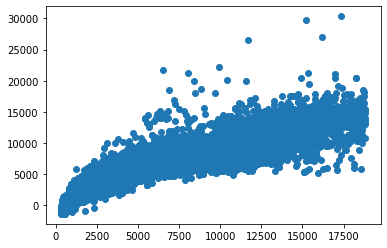

In [34]:
plt.scatter(y_test, predictions)


## Model Accuracy 

In [35]:
print("Score:", lm.score(x_test, y_test))

Score: 0.8614534265975258


## This test is 86% accurate based on the score above

# Final check is to examine the error rates for the Model Fit


In [36]:
metrics.mean_absolute_error(y_test, predictions)


962.3332233527374

In [37]:
metrics.mean_squared_error(y_test, predictions)


2222616.9450689903

In [38]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))


1490.8443731888954

# K-Fold Cross Validation

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [40]:
# Create the Folds
kfold = KFold(5)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [10788 10789 10790 ... 53937 53938 53939], test: [    0     1     2 ... 10785 10786 10787]
train: [    0     1     2 ... 53937 53938 53939], test: [10788 10789 10790 ... 21573 21574 21575]
train: [    0     1     2 ... 53937 53938 53939], test: [21576 21577 21578 ... 32361 32362 32363]
train: [    0     1     2 ... 53937 53938 53939], test: [32364 32365 32366 ... 43149 43150 43151]
train: [    0     1     2 ... 43149 43150 43151], test: [43152 43153 43154 ... 53937 53938 53939]


In [41]:
print(cross_val_score(lm, x,y, cv=5))

[0.86468262 0.86096199 0.86197965 0.86332552 0.86890722]
